# ***Power Transformers***
***sklearn.preprocessing.PowerTransformer***

>class sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)

1. ***Apply a power transform featurewise to make data more Gaussian-like (same as Normal Distribution).***


2. ***Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.***


3. ***Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood(sklearn) and also done by Bayesian statistic but not in sklearn.***


4. ***Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.***


5. ***By default, zero-mean, unit-variance normalization is applied to the transformed data so don't need to apply standardization***


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head(4)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05


In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe() #It's having 0 which is an issue when it comes to Box-Cox  

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
X = df.drop(columns=['Strength'])
y = df['Strength']


In [10]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [11]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314848

In [25]:
# let's do cross-val: We can see that the situation here is much worse than actual
cross_val_score(lr,X,y,scoring ='r2')


array([0.33015205, 0.41207076, 0.45175533, 0.60725028, 0.50374183])

In [13]:
%matplotlib inline

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train) , columns=X_train.columns)
X_test_scaled = pd.DataFrame(scalar.transform(X_test),columns=X_test.columns)

## ***Distribution Plots and QQ plots for each feature***

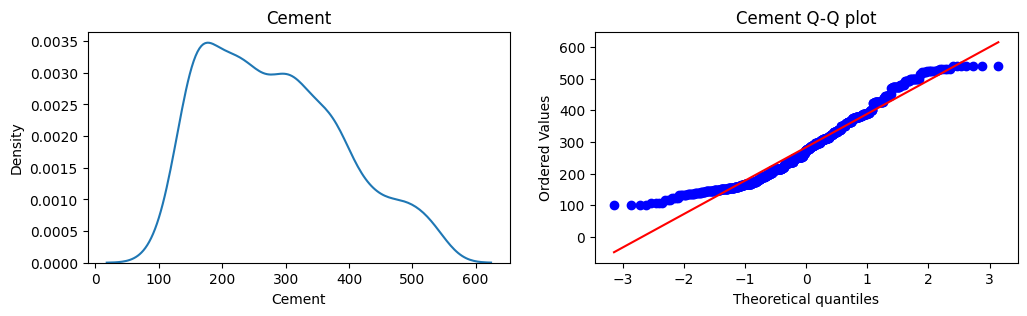

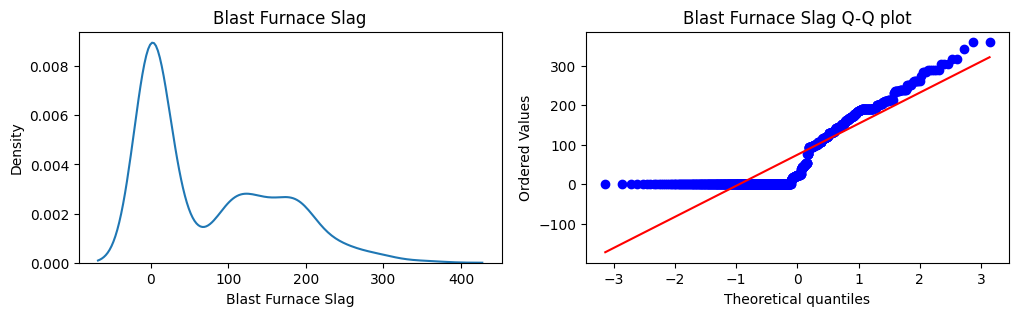

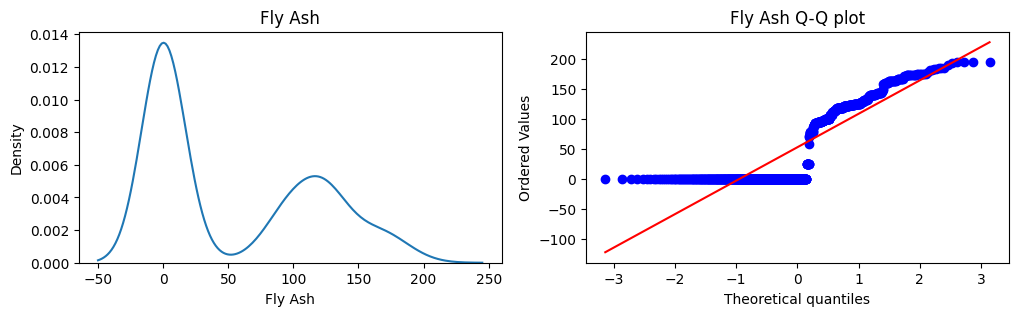

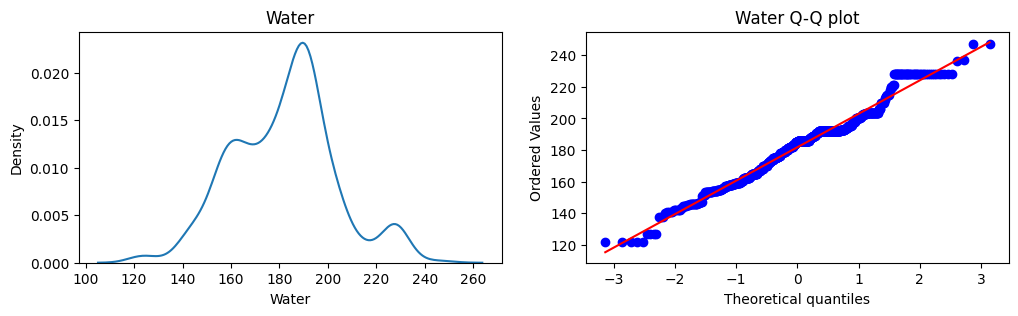

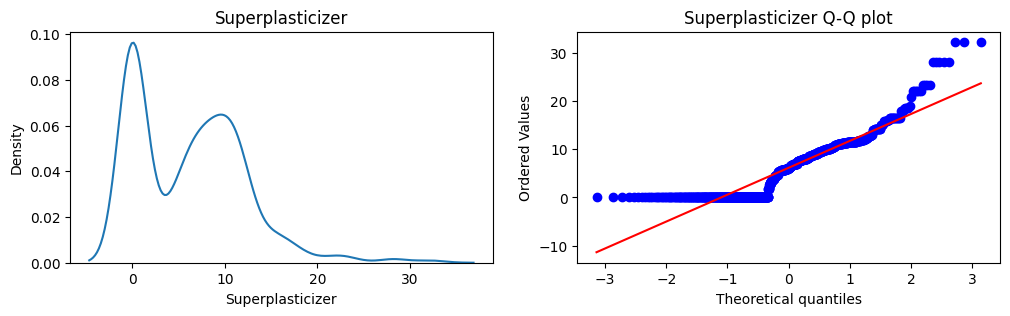

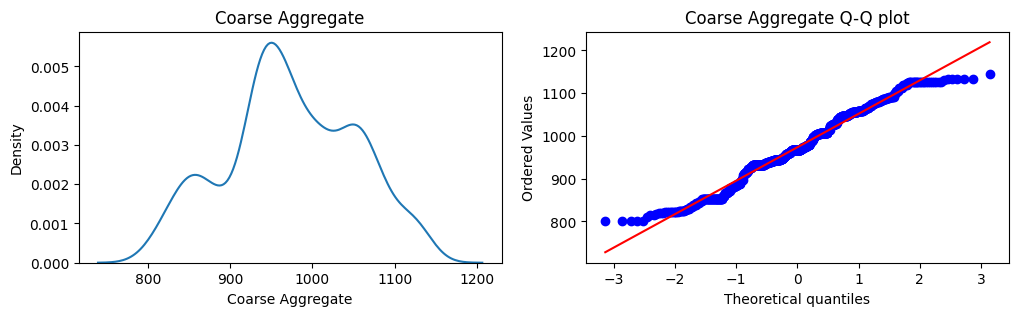

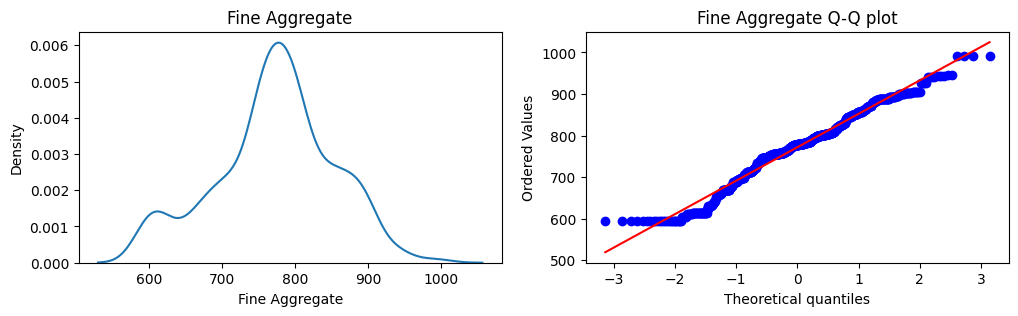

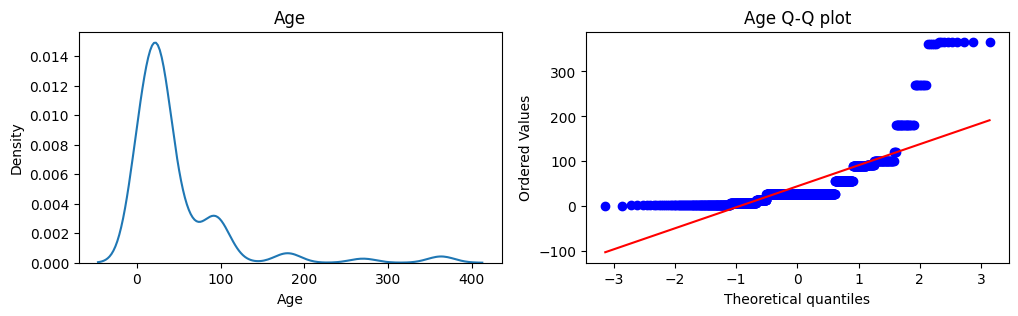

In [15]:
for col in X_train_scaled.columns:
    fig, axes = plt.subplots(1,2, figsize = (12,3))
    sns.kdeplot(X_train[col] , ax  = axes[0])
    axes[0].set_title(col)
    
    stats.probplot(X_train[col] , dist ='norm' , plot =plt)
    plt.title(col+' Q-Q plot')
    
    plt.show()

In [16]:
# Applying the Box-Cox Transform 
# Now here I'll not be using standardized data because in Power Transfor there is already standardization is implemented on columns

pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)

# Here I am adding 0.000001 because box- cox can't work with 0 values in data , so I am adding very very small values which 
# is not going to change anything so much (read in a blog)
pd.DataFrame({'cols':X_train.columns , 'box-cox_lambdas': pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [17]:
# applying Linear regression on transformed data

lr.fit(X_train_transformed,y_train)
y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825006181188

In [18]:
#  Now the score is coming out to be better but still always look out for cross-val-score
X_transformed =pt.fit_transform(X+0.0000001)
np.mean(cross_val_score(lr,X_transformed,y,scoring ='r2'))

0.6658537942219862

In [19]:
X_train_transformed = pd.DataFrame(X_train_transformed , columns = X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed , columns = X_test.columns)

## ***Before and after comparison for Box-Cox plot { Distribution Plots }***
- Left one : Before Transformation
- Right one - After Transformation

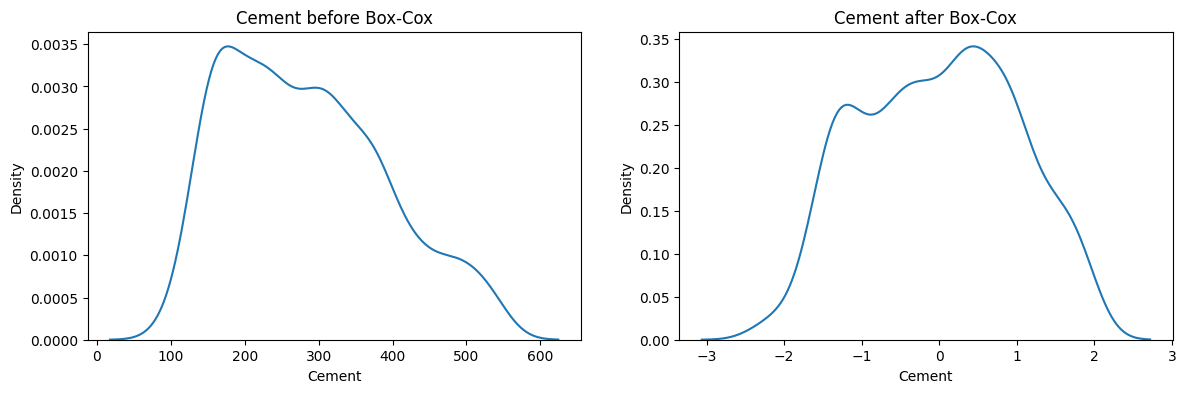

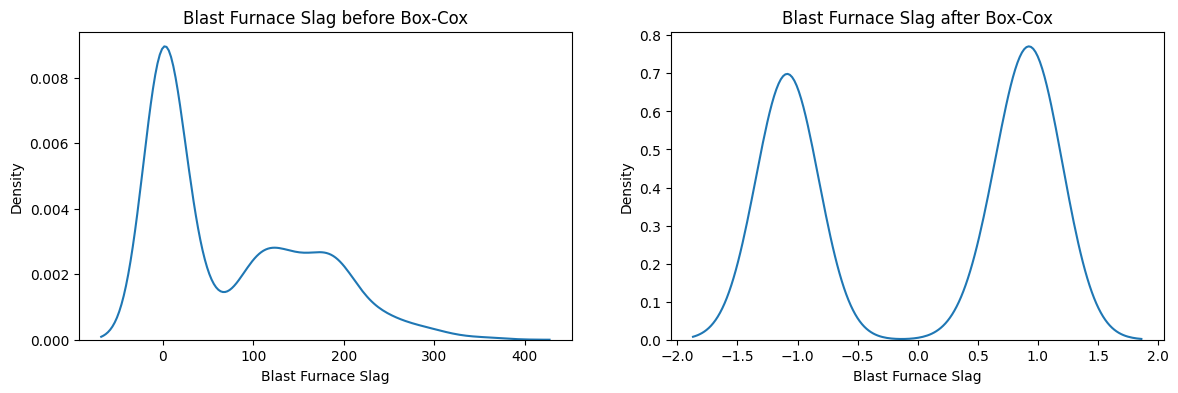

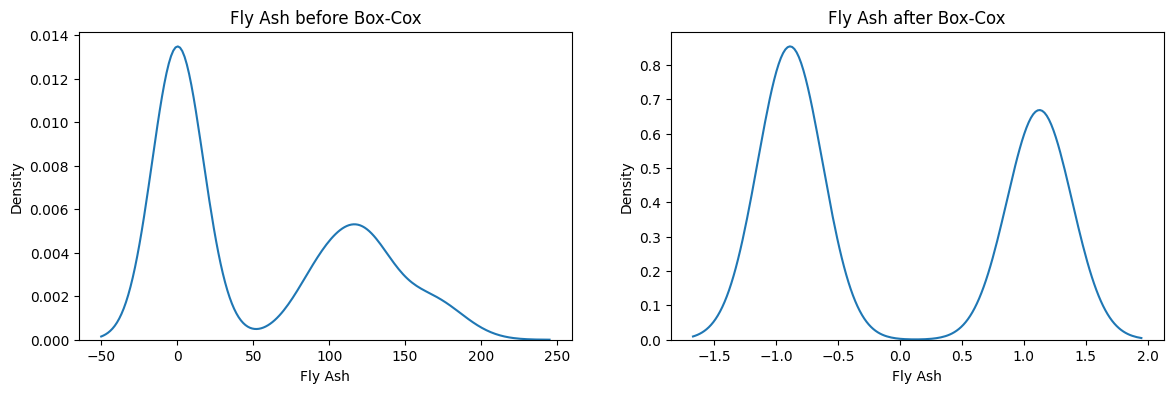

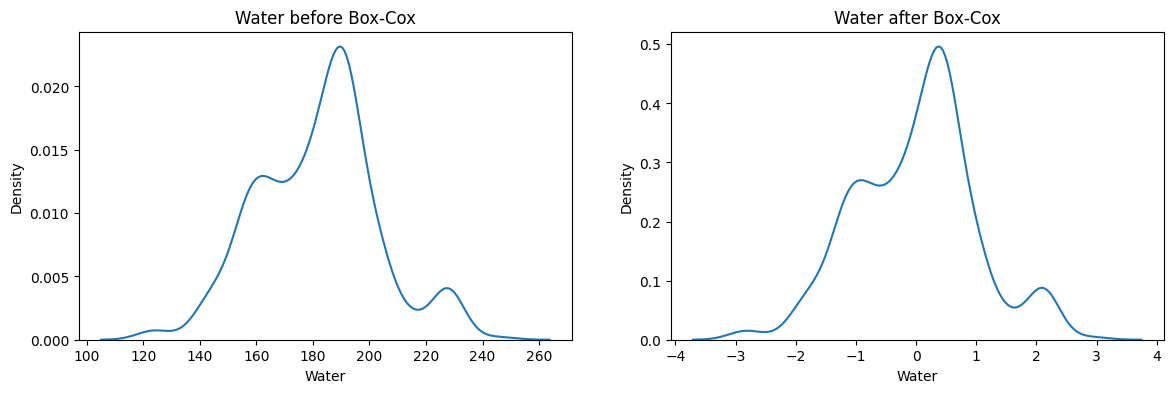

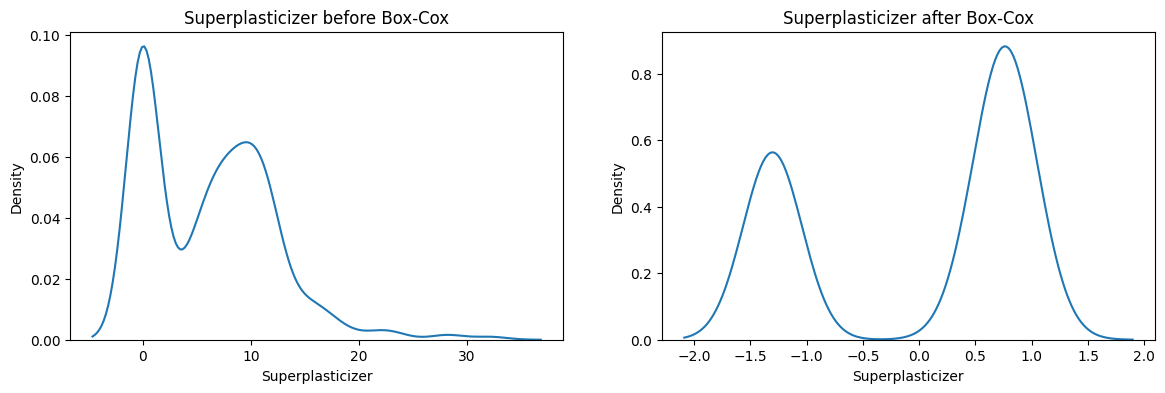

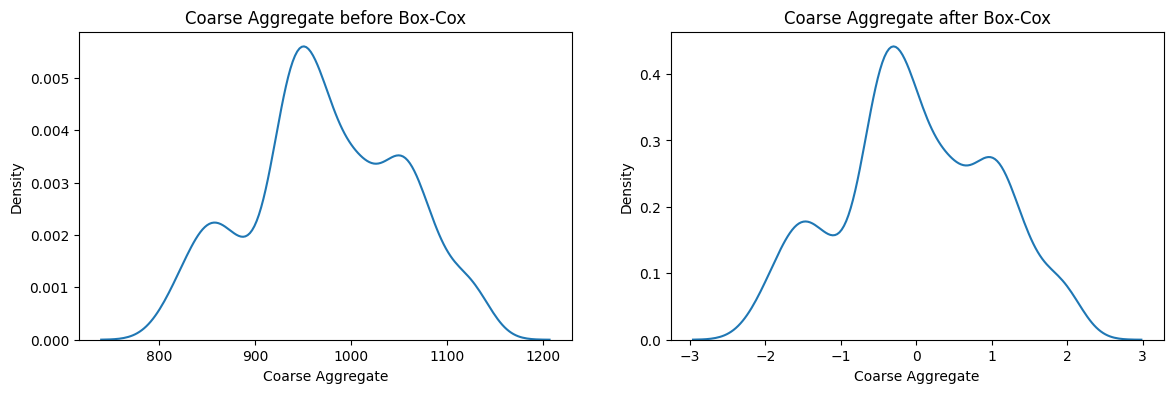

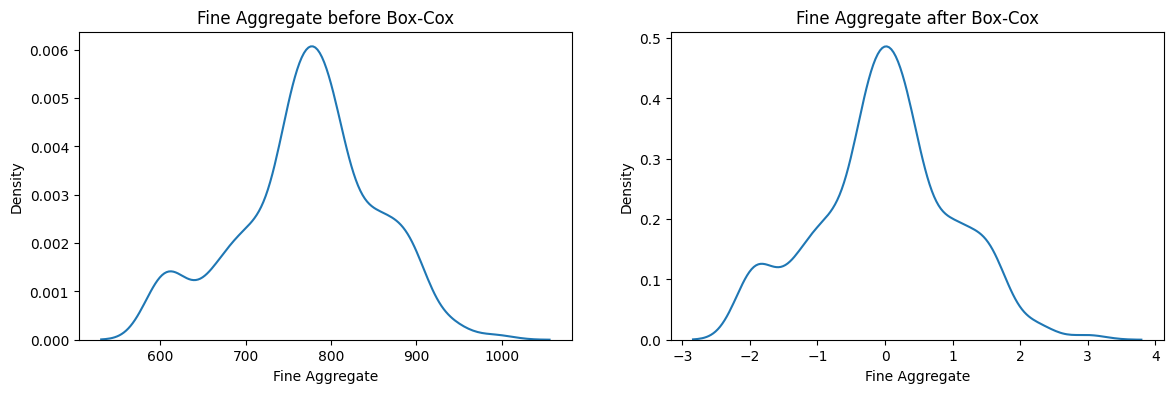

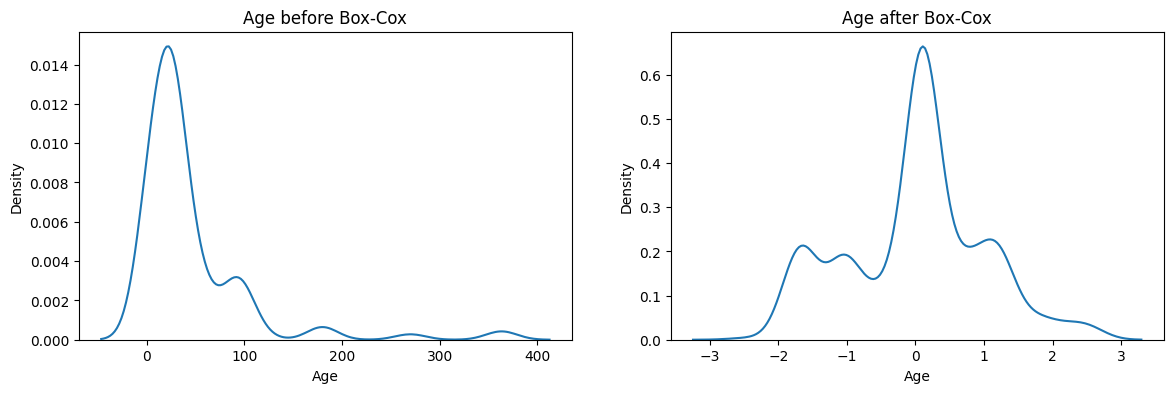

In [20]:
# Before and after comparison for Box-Cox plot
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col + ' before Box-Cox')
    
    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col + ' after Box-Cox')
    
    plt.show()

## ***Observations :***
> We have calculated r2 score without any power tranformers, Box cox , Yeo Johnson transformation on all the features and then plotted them as well to get the gist of it and how the data is distributed.

>## Without any 
     - r2 score: ***0.6275531792314851***
     - cross val score: ***0.4609940491662866***
>## Box-Cox Transformation 
     - r2 score: ***0.8047825006181188***
     - cross val score:***0.6658537942219864*** 



## ***Box- Cox & Yeo Johnsons Lambda Values for each Columns***

In [21]:
pd.DataFrame({'cols': X_train.columns ,'box-cox-lambdas': pt.lambdas_ })

,cols,box-cox-lambdas
0,Cement,0.172271
1,Blast Furnace Slag,0.022924
2,Fly Ash,-0.028797
3,Water,0.809568
4,Superplasticizer,0.087911
5,Coarse Aggregate,1.129168
6,Fine Aggregate,1.829625
7,Age,0.048975
